In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Load the iris dataset
iris = pd.read_csv('Iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
iris.shape

(150, 6)

In [3]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [4]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
iris = iris.drop("Id", axis=1)

In [6]:
iris["Species"].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

In [7]:
x = iris[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
y = iris['Species']

In [8]:

from sklearn.preprocessing import LabelEncoder
lbe= LabelEncoder()
y=lbe.fit_transform(y)

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0 )

In [10]:
from sklearn.tree import DecisionTreeClassifier
# Step 2: Make an instance of the Model
clf = DecisionTreeClassifier(max_depth = 2, 
                             random_state = 0)
# Step 3: Train the model on the data
clf.fit(x_train, y_train)
# Step 4: Predict labels of unseen (test) data
# Not doing this step in the tutorial
y_pred = clf.predict(x_test)

In [11]:
from sklearn import tree


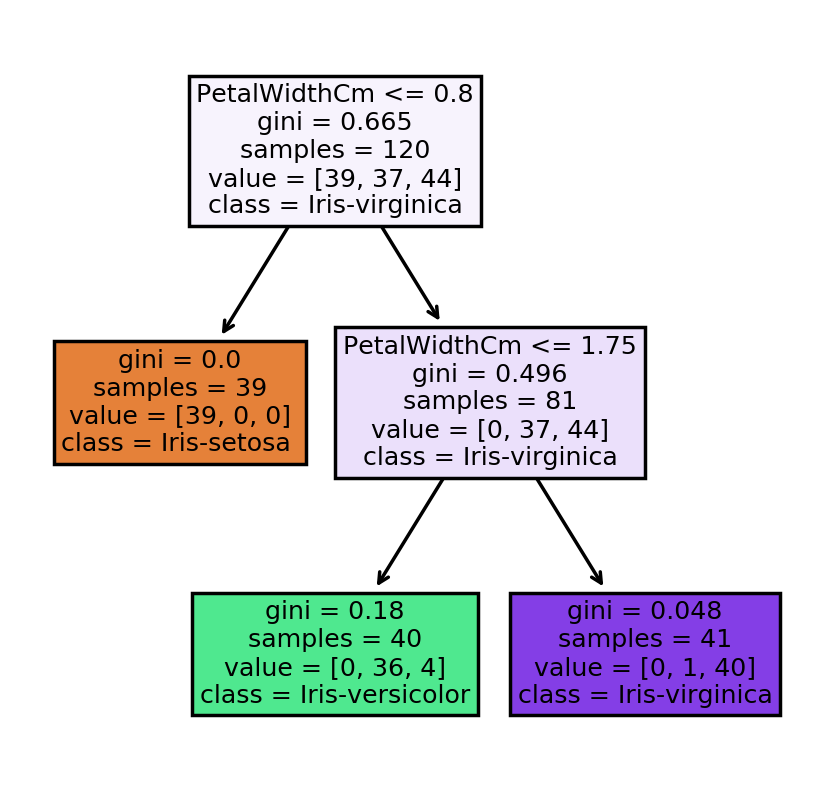

In [12]:
fn=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
cn=['Iris-setosa ', 'Iris-versicolor', 'Iris-virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=250)
tree.plot_tree(clf,
               feature_names = fn, 
               class_names=cn,
               filled = True);


### **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [13]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score,f1_score

In [14]:

print('Accuracy score :', accuracy_score(y_test,y_pred))

Accuracy score : 0.9666666666666667


In [15]:
print('Confusion matrics :', confusion_matrix(y_test,y_pred))

Confusion matrics : [[11  0  0]
 [ 0 13  0]
 [ 0  1  5]]


In [16]:
print('Classification Report :', classification_report(y_test,y_pred))

Classification Report :               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.93      1.00      0.96        13
           2       1.00      0.83      0.91         6

    accuracy                           0.97        30
   macro avg       0.98      0.94      0.96        30
weighted avg       0.97      0.97      0.97        30



In [17]:
print('F1_score',f1_score(y_test, y_pred,average='weighted'))

F1_score 0.9657687991021324


Text(0.5, 1.0, 'scatter')

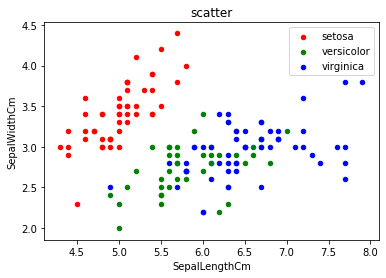

In [18]:
# Visualising using Sepal length and sepal width
ax = iris[iris.Species=='Iris-setosa'].plot.scatter(x='SepalLengthCm', y='SepalWidthCm', 
                                                    color='red', label='setosa')
iris[iris.Species=='Iris-versicolor'].plot.scatter(x='SepalLengthCm', y='SepalWidthCm', 
                                                color='green', label='versicolor', ax=ax)
iris[iris.Species=='Iris-virginica'].plot.scatter(x='SepalLengthCm', y='SepalWidthCm', 
                                                color='blue', label='virginica', ax=ax)
ax.set_title("scatter")

Text(0.5, 1.0, 'scatter')

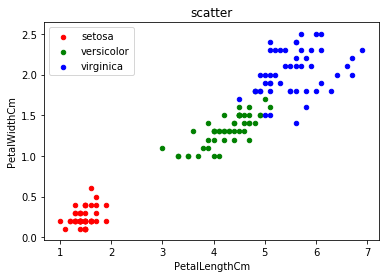

In [19]:
ax = iris[iris.Species=='Iris-setosa'].plot.scatter(x='PetalLengthCm', y='PetalWidthCm', 
                                                    color='red', label='setosa')
iris[iris.Species=='Iris-versicolor'].plot.scatter(x='PetalLengthCm', y='PetalWidthCm', 
                                                color='green', label='versicolor', ax=ax)
iris[iris.Species=='Iris-virginica'].plot.scatter(x='PetalLengthCm', y='PetalWidthCm', 
                                                color='blue', label='virginica', ax=ax)
ax.set_title("scatter")

F:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


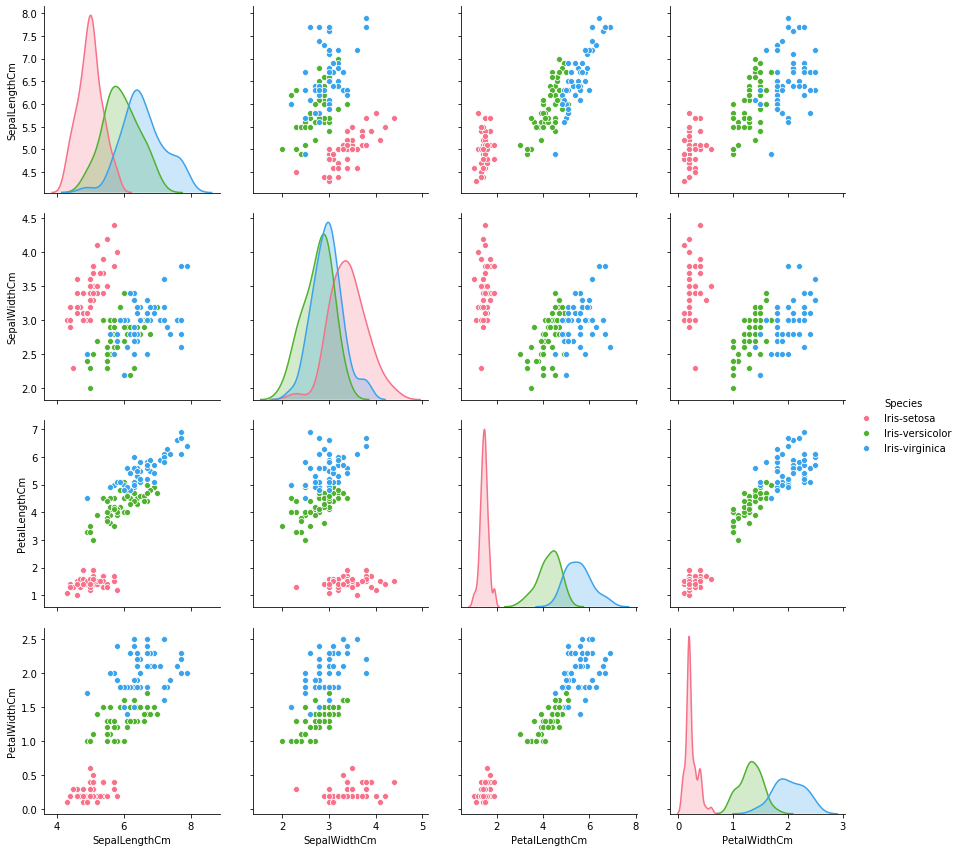

In [20]:
#pairplot
sns.pairplot(iris, hue="Species", palette="husl", size=3)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021D1B8FD7C8>,
      dtype=object)

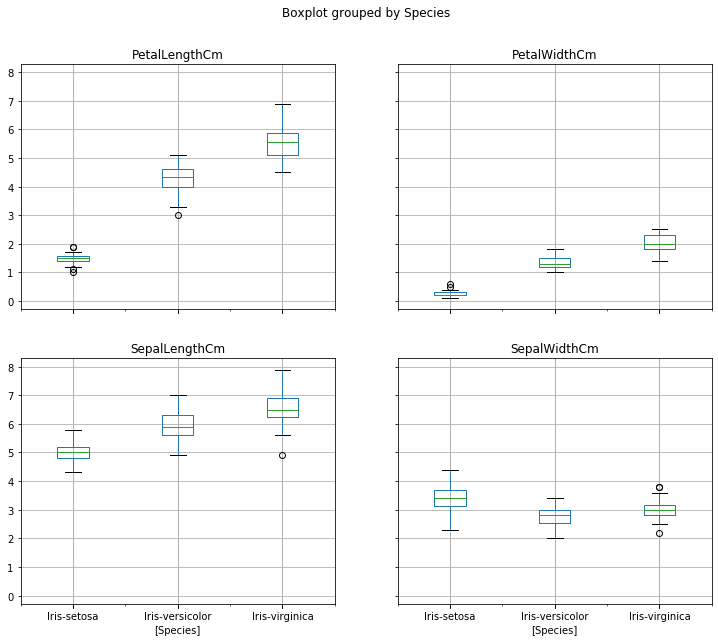

In [21]:
iris.boxplot(by="Species", figsize=(12, 10))